# EducationIndicators2014

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.stats as stats

In [78]:
URL = "https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/clustering/EducationIndicators2014.csv"
education_indicators = pd.read_csv(URL)
education_indicators.head()

,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
0,Albania,2893654,1.321986e+10,0.73,7097,333291,195720,16.10,77.83,5
1,Arab World,384222592,2.889750e+12,6.42,6827541,30972246,45126932,11.52,70.57,6
2,United Arab Emirates,9086139,4.019580e+11,0.22,14611,411040,409776,3.60,77.37,5
3,Azerbaijan,9535079,7.519801e+10,0.16,22821,949294,517708,5.20,70.76,4
4,Burundi,10816860,3.093647e+09,24.25,69246,583308,2046794,6.90,56.69,6


In [79]:
education_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  107 non-null    object 
 1   PPT           107 non-null    int64  
 2   GDP           107 non-null    float64
 3   PRPE          107 non-null    float64
 4   OOCP          107 non-null    int64  
 5   ESE           107 non-null    int64  
 6   EPE           107 non-null    int64  
 7   UNEMP         107 non-null    float64
 8   LEB           107 non-null    float64
 9   TDP           107 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 8.5+ KB


In [80]:
education_indicators.shape

(107, 10)

In [82]:
X = education_indicators.loc[:, education_indicators.columns != 'Country Name']

In [83]:
X.columns

Index(['PPT', 'GDP', 'PRPE', 'OOCP', 'ESE', 'EPE', 'UNEMP', 'LEB', 'TDP'], dtype='object')

In [85]:
scaler = StandardScaler()
X[['PPT', 'GDP', 'PRPE', 'OOCP', 'ESE', 'EPE', 'UNEMP', 'LEB', 'TDP']] = scaler.fit_transform(X[['PPT', 'GDP', 'PRPE', 'OOCP', 'ESE', 'EPE', 'UNEMP', 'LEB', 'TDP']])

C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRPE', ylabel='Density'>

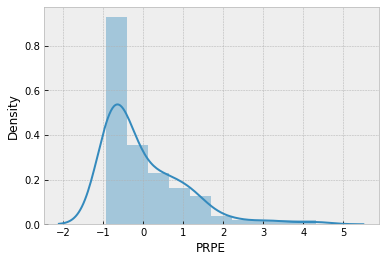

In [89]:
sns.distplot(X['PRPE'])

In [90]:
%%time

ks = range(1, 10)
inertias = []

for k in ks:
    print(k)
    model = KMeans(
        n_clusters=k,
        n_init=50,
        max_iter=100
    )
    model.fit(X)
    inertias.append(model.inertia_)

Wall time: 0 ns
1


C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


2
3
4
5
6
7
8
9


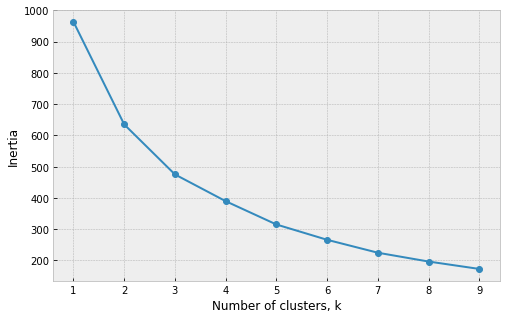

In [91]:
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [104]:
final_model = KMeans(
    n_clusters=3,
    n_init=50,
    max_iter=500,
    random_state=42
)
final_model.fit(X)

KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=42)

In [105]:
clust_num = final_model.predict(X)
X['cluster'] = clust_num

In [106]:
X

,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP,cluster
0,-0.479907,-0.416813,-0.766181,-0.488142,-0.468523,-0.489005,1.403578,0.893646,-0.789641,2
1,-0.198071,-0.171649,0.463226,0.023728,-0.183005,-0.164338,0.592286,-0.049922,0.490535,2
2,-0.475330,-0.383681,-0.876374,-0.487578,-0.467799,-0.487458,-0.810646,0.833861,-0.789641,2
3,-0.474999,-0.411530,-0.889338,-0.486962,-0.462783,-0.486678,-0.527226,-0.025228,-2.069816,2
4,-0.474051,-0.417676,4.315659,-0.483478,-0.466194,-0.475629,-0.226091,-1.853879,0.490535,0
...,...,...,...,...,...,...,...,...,...,...
102,0.238101,-0.267024,0.843500,2.073095,0.051499,0.652963,-0.036553,-1.610839,0.490535,0
103,-0.448519,-0.406561,-0.910945,-0.484437,-0.446341,-0.478243,-0.084381,0.030658,-2.069816,2
104,1.420081,1.459160,-0.372944,0.174092,1.409656,1.002667,-0.403229,0.453054,0.490535,1
105,-0.478872,-0.416856,-0.880696,-0.486210,-0.465020,-0.487222,3.192672,0.252903,-2.069816,2


In [107]:
X['cluster'].value_counts()

2    61
0    30
1    16
Name: cluster, dtype: int64

In [115]:
pca = PCA()

principal_components = pca.fit_transform(X.iloc[:, X.columns != 'cluster'])

df_pca = pd.DataFrame(
        data=principal_components, 
        columns=[f'pc-{k}' for k in range(1, pca.n_components_+1)]
    )

df_pca.head()

,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9
0,-1.340927,-1.372862,1.068557,-0.393655,-0.111934,-0.296078,-0.017855,-0.002096,0.006382
1,-0.307596,0.517740,0.661688,0.285358,-0.023526,-0.220727,-0.077889,0.002116,-0.031312
2,-1.077108,-1.186317,-1.082281,-0.077067,-0.239957,-0.035992,-0.087213,0.004515,0.009301
3,-1.224506,-1.169052,-1.037578,-1.544724,0.181965,0.273043,-0.006067,0.008706,0.013741
4,-0.777933,4.205126,-0.089969,-0.186771,1.809969,-1.292469,0.389567,-0.023125,-0.001798


In [116]:
pca.explained_variance_ratio_

array([4.87718291e-01, 2.19377290e-01, 1.05955583e-01, 9.50818517e-02,
       4.66878416e-02, 2.73739270e-02, 1.74236965e-02, 2.43535634e-04,
       1.37983260e-04])

In [114]:
X.iloc[:, X.columns != 'cluster']

,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
0,-0.479907,-0.416813,-0.766181,-0.488142,-0.468523,-0.489005,1.403578,0.893646,-0.789641
1,-0.198071,-0.171649,0.463226,0.023728,-0.183005,-0.164338,0.592286,-0.049922,0.490535
2,-0.475330,-0.383681,-0.876374,-0.487578,-0.467799,-0.487458,-0.810646,0.833861,-0.789641
3,-0.474999,-0.411530,-0.889338,-0.486962,-0.462783,-0.486678,-0.527226,-0.025228,-2.069816
4,-0.474051,-0.417676,4.315659,-0.483478,-0.466194,-0.475629,-0.226091,-1.853879,0.490535
...,...,...,...,...,...,...,...,...,...
102,0.238101,-0.267024,0.843500,2.073095,0.051499,0.652963,-0.036553,-1.610839,0.490535
103,-0.448519,-0.406561,-0.910945,-0.484437,-0.446341,-0.478243,-0.084381,0.030658,-2.069816
104,1.420081,1.459160,-0.372944,0.174092,1.409656,1.002667,-0.403229,0.453054,0.490535
105,-0.478872,-0.416856,-0.880696,-0.486210,-0.465020,-0.487222,3.192672,0.252903,-2.069816


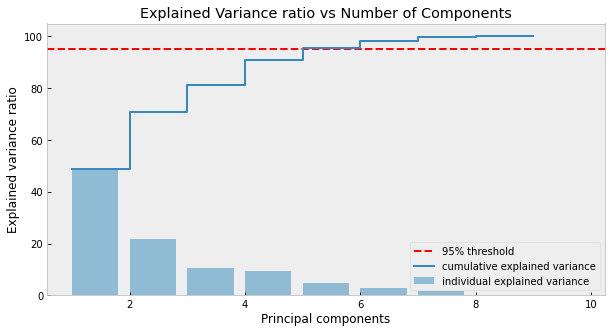

In [117]:
var_exp = pca.explained_variance_ratio_*100
cum_var_exp = pca.explained_variance_ratio_.cumsum()*100
components = range(1, len(var_exp) + 1)

plt.figure(figsize=(10, 5))
plt.axhline(y=95, color="red", linestyle="--", label="95% threshold")
plt.step(components, cum_var_exp, where='post',
        label='cumulative explained variance')
plt.bar(components, var_exp, alpha=0.5, align='edge',
        label='individual explained variance')
plt.title('Explained Variance ratio vs Number of Components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.show()

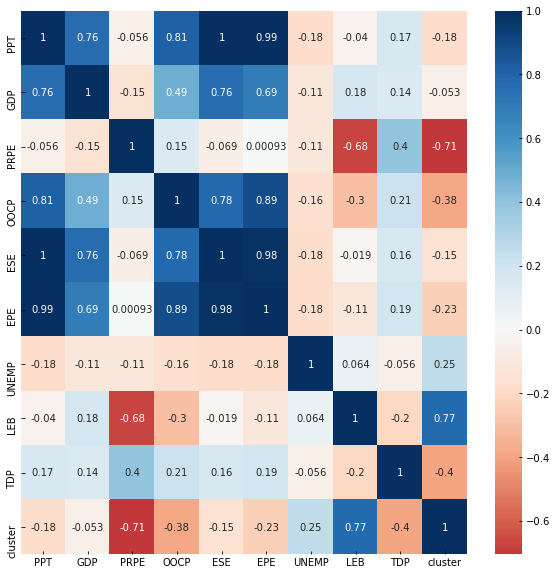

In [119]:
#plt.title("Features correlation")
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(
    X.corr(),
    annot=True,
    cmap='RdBu',
    center=0,
)
plt.show()

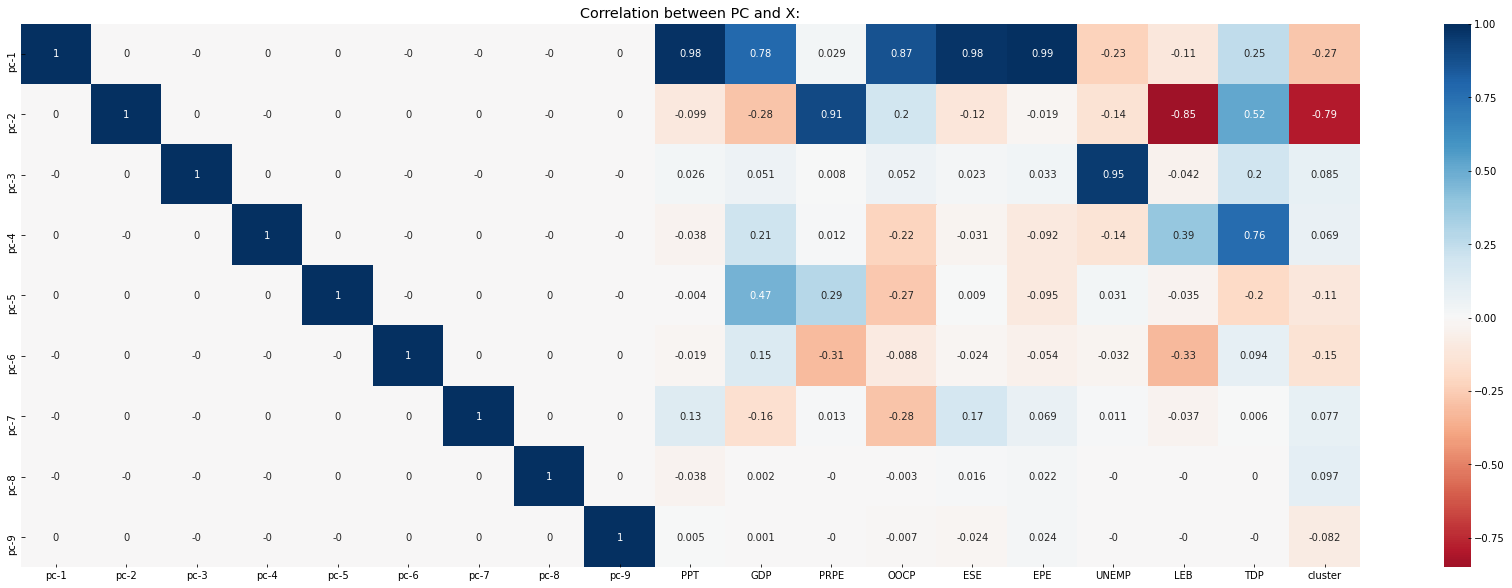

In [122]:
for col in X.iloc[:, X.columns != 'cluster']:
    df_pca[col] = X[col]

plt.figure(figsize=(30,10))
plt.title("Correlation between PC and X:")
sns.heatmap(
    df_pca.corr().round(3).iloc[:9], 
    annot=True, 
    cmap='RdBu',
    center=0,
)
plt.show()

In [124]:
X_important = X[['PPT', 'GDP', 'PRPE', 'OOCP', 'UNEMP', 'LEB', 'TDP']]


In [125]:
X_important

,PPT,GDP,PRPE,OOCP,UNEMP,LEB,TDP
0,-0.479907,-0.416813,-0.766181,-0.488142,1.403578,0.893646,-0.789641
1,-0.198071,-0.171649,0.463226,0.023728,0.592286,-0.049922,0.490535
2,-0.475330,-0.383681,-0.876374,-0.487578,-0.810646,0.833861,-0.789641
3,-0.474999,-0.411530,-0.889338,-0.486962,-0.527226,-0.025228,-2.069816
4,-0.474051,-0.417676,4.315659,-0.483478,-0.226091,-1.853879,0.490535
...,...,...,...,...,...,...,...
102,0.238101,-0.267024,0.843500,2.073095,-0.036553,-1.610839,0.490535
103,-0.448519,-0.406561,-0.910945,-0.484437,-0.084381,0.030658,-2.069816
104,1.420081,1.459160,-0.372944,0.174092,-0.403229,0.453054,0.490535
105,-0.478872,-0.416856,-0.880696,-0.486210,3.192672,0.252903,-2.069816


In [126]:
X_important[['PPT', 'GDP', 'PRPE', 'OOCP', 'UNEMP', 'LEB', 'TDP']] = scaler.fit_transform(X_important[['PPT', 'GDP', 'PRPE', 'OOCP', 'UNEMP', 'LEB', 'TDP']])

C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\pandas\core\frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [127]:
%%time

ks = range(1, 10)
inertias = []

for k in ks:
    print(k)
    model = KMeans(
        n_clusters=k,
        n_init=50,
        max_iter=100
    )
    model.fit(X_important)
    inertias.append(model.inertia_)

1


C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


2
3
4
5
6
7
8
9
Wall time: 6.47 s


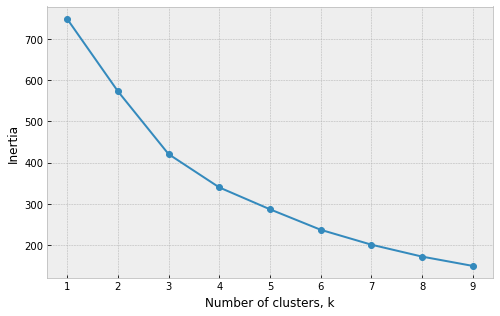

In [128]:
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [141]:
final_model = KMeans(
    n_clusters=3,
    n_init=50,
    max_iter=500,
    random_state=42
)
final_model.fit(X_important)

KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=42)

In [142]:
clust_num = final_model.predict(X_important)
X['cluster_important'] = clust_num

<AxesSubplot:xlabel='pc-1', ylabel='pc-3'>

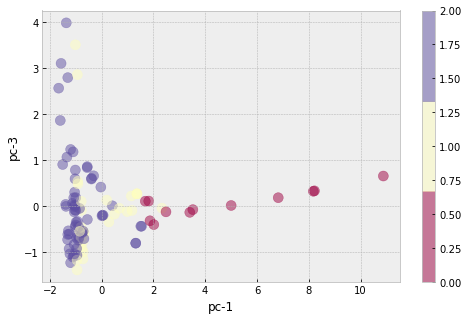

In [143]:
df_pca["cluster"] = X['cluster_important']

fig, ax = plt.subplots(figsize = (8,5))
df_pca.plot(ax=ax, 
            kind="scatter", 
            x="pc-1", y="pc-3",
            c=df_pca["cluster"], 
#            edgecolor='none',
            s=100,
            alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', df_pca["cluster"].nunique())
    )

<AxesSubplot:xlabel='pc-1', ylabel='pc-2'>

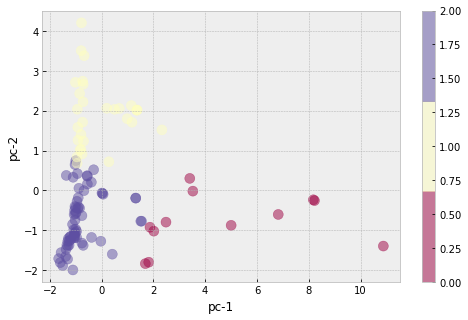

In [144]:
df_pca["cluster"] = X['cluster_important']

fig, ax = plt.subplots(figsize = (8,5))
df_pca.plot(ax=ax, 
            kind="scatter", 
            x="pc-1", y="pc-2",
            c=df_pca["cluster"], 
#            edgecolor='none',
            s=100,
            alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', df_pca["cluster"].nunique())
    )

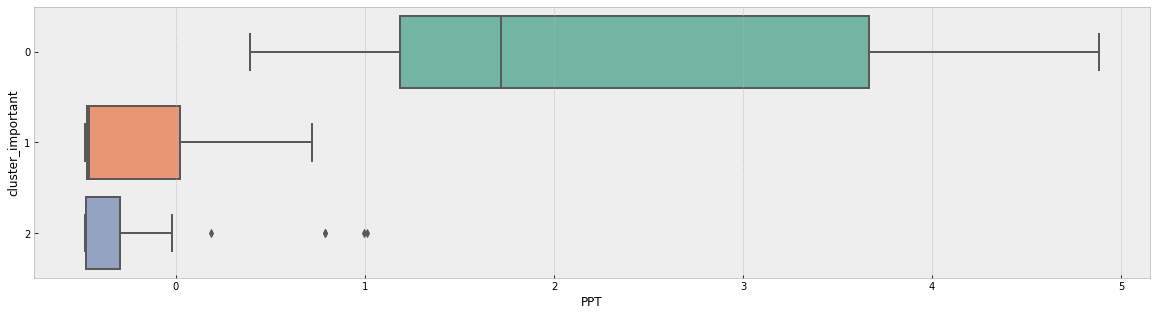

In [145]:
plt.figure(figsize=(20,5))
sns.boxplot(x="PPT", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

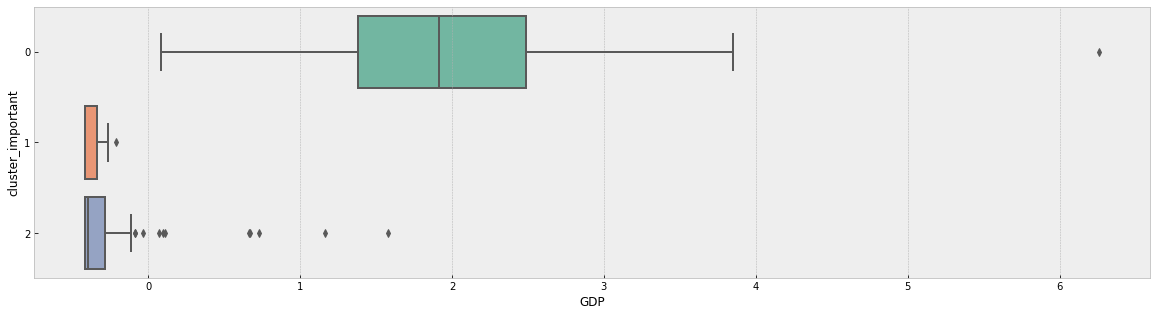

In [146]:
plt.figure(figsize=(20,5))
sns.boxplot(x="GDP", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

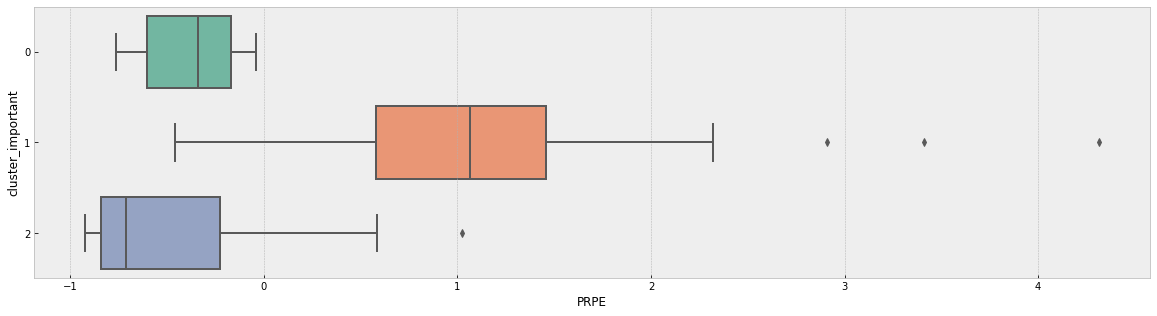

In [147]:
plt.figure(figsize=(20,5))
sns.boxplot(x="PRPE", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

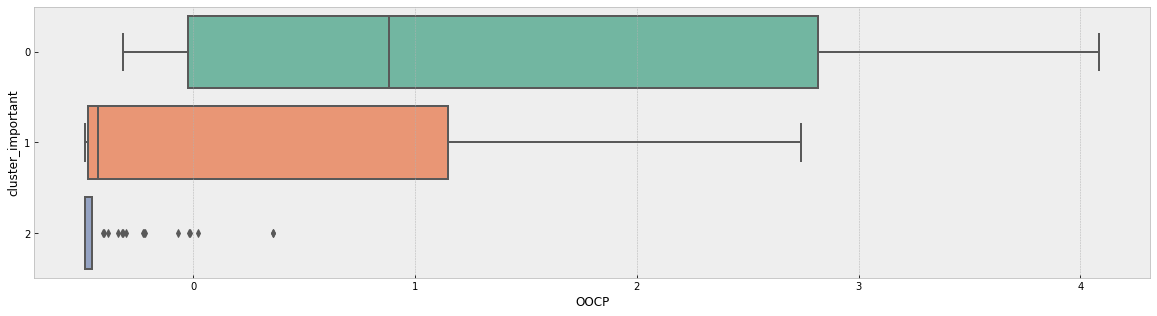

In [148]:
plt.figure(figsize=(20,5))
sns.boxplot(x="OOCP", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

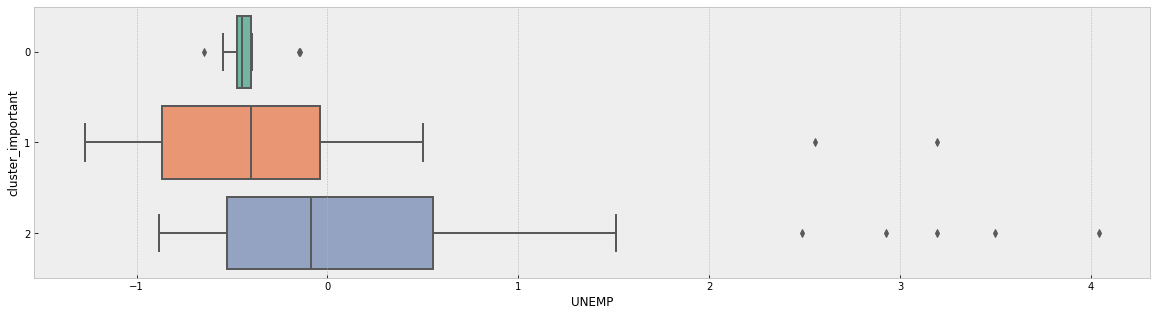

In [149]:
plt.figure(figsize=(20,5))
sns.boxplot(x="UNEMP", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

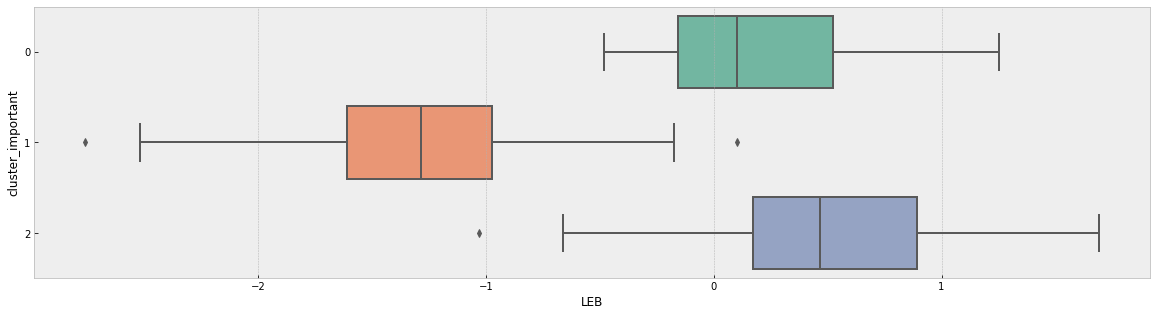

In [150]:
plt.figure(figsize=(20,5))
sns.boxplot(x="LEB", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

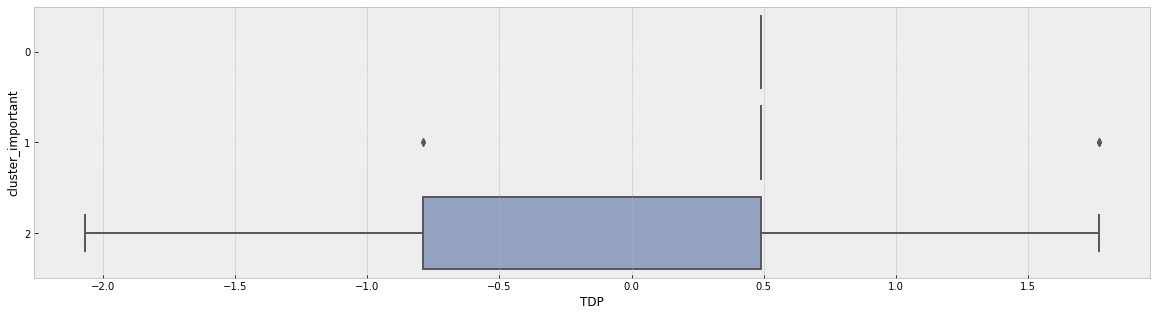

In [151]:
plt.figure(figsize=(20,5))
sns.boxplot(x="TDP", y="cluster_important", data=X, palette="Set2", orient='h')
plt.show()

In [155]:
pd.pivot_table(data=X, index="cluster_important", aggfunc="mean")

,EPE,ESE,GDP,LEB,OOCP,PPT,PRPE,TDP,UNEMP,cluster
cluster_important,,,,,,,,,,
0,2.135918,2.300997,2.202868,0.255611,1.450844,2.282036,-0.356559,0.490535,-0.421090,1.000000
1,-0.116928,-0.283744,-0.373673,-1.261008,0.292823,-0.234753,1.205193,0.533207,-0.260869,0.000000
2,-0.340356,-0.293841,-0.234219,0.534814,-0.402997,-0.312952,-0.490416,-0.336656,0.198141,1.938462


In [157]:
X.cluster.value_counts()

2    61
0    30
1    16
Name: cluster, dtype: int64

In [158]:
#0 -> 1 -> 2